In [3]:
from scipy.stats import zipf, pareto, chi2, gamma
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)
plt.rc(('xtick', 'ytick'), color='white')

In [2]:
s = 4   # exponent (Zipf)
a = 4   # shape (Pareto)
xm = 4  # scale (Pareto)

# ДЗ2. Основные понятия математической статистики

## 2.1. Моделирование случайных величин

In [3]:
volumes = (5, 10, 100, 1000, 100000)
zipfSamples = [[zipf.rvs(s, size=N, random_state=i+10) for i in range(5)] for N in volumes]
paretoSamples = [[pareto.rvs(a, scale=xm, size=N, random_state=i+13) for i in range(5)] for N in volumes]

In [4]:
print(*zipfSamples[0], sep='\n')   # n = 5

[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 2 2]
[1 1 3 1 1]
[1 1 1 1 1]


In [5]:
print(*zipfSamples[1], sep='\n')   # n = 10

[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 2 2 1 1 1 1 1]
[1 1 3 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 2 1]


In [6]:
print(*paretoSamples[0], sep='\n')   # n = 5

[5.83 4.28 6.18 9.3  9.83]
[4.79 5.8  6.67 4.01 4.39]
[6.41 4.2  4.06 4.47 4.34]
[4.26 4.81 4.89 4.05 4.47]
[4.36 4.83 4.22 4.07 5.89]


In [7]:
print(*paretoSamples[1], sep='\n')   # n = 10

[5.83 4.28 6.18 9.3  9.83 4.65 5.06 5.81 5.17 5.51]
[4.79 5.8  6.67 4.01 4.39 8.82 4.79 4.4  4.85 4.26]
[6.41 4.2  4.06 4.47 4.34 4.83 4.38 4.38 4.12 4.3 ]
[4.26 4.81 4.89 4.05 4.47 4.26 5.36 4.18 4.07 8.12]
[4.36 4.83 4.22 4.07 5.89 5.22 5.16 4.96 4.04 4.47]


## 2.2. Построение эмпирической функции распределения

### 2.2.1. Распределение Ципфа

#### 2.2.1.1. Эмпирические функции распределения

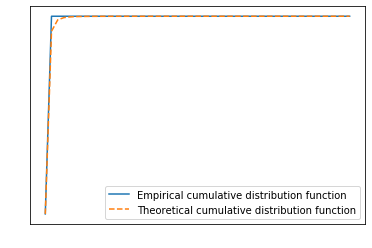

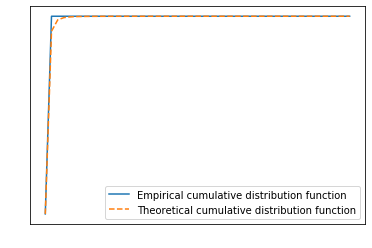

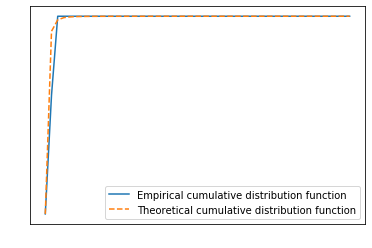

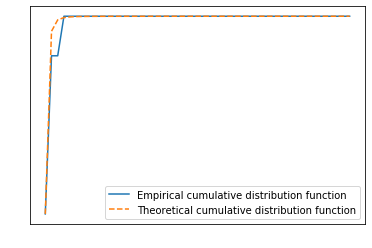

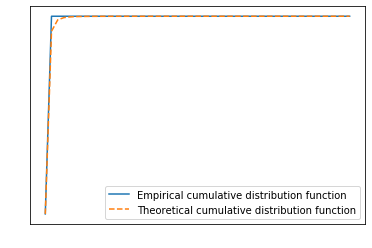

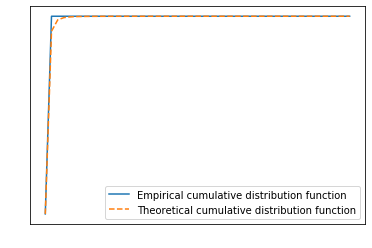

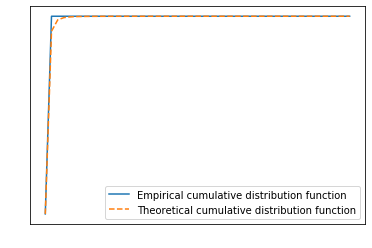

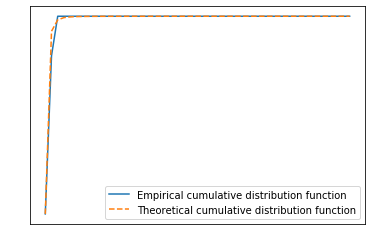

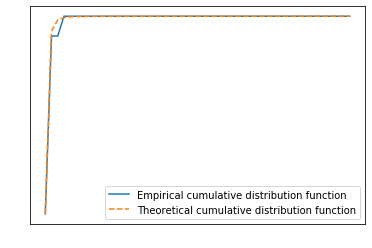

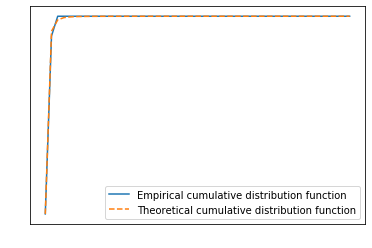

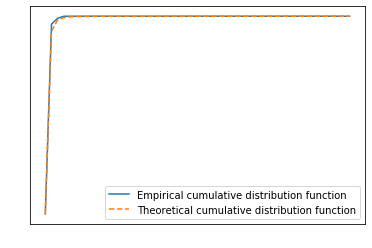

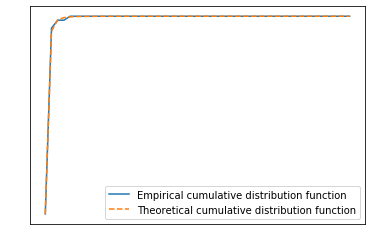

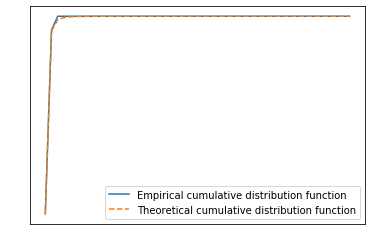

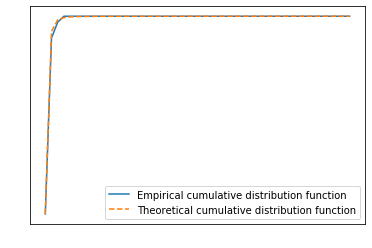

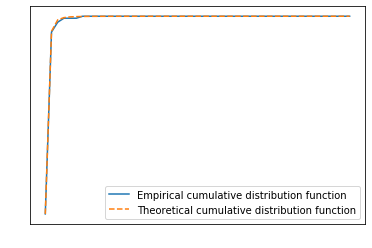

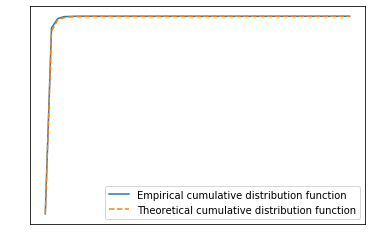

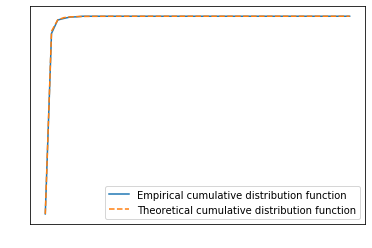

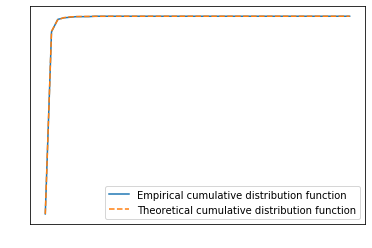

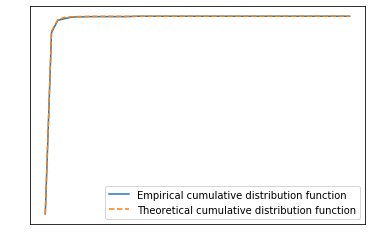

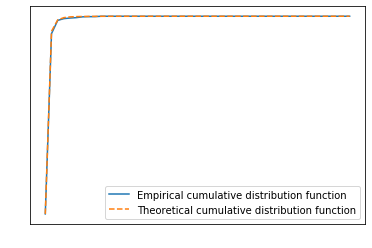

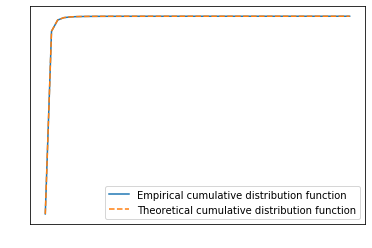

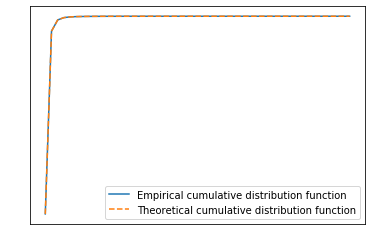

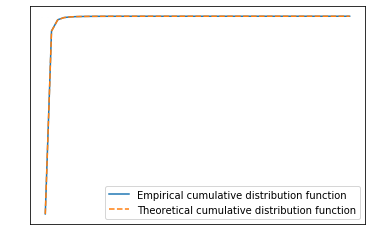

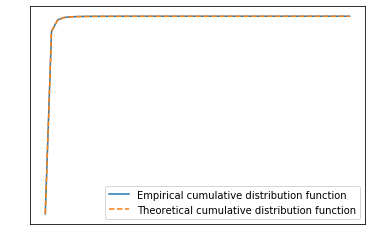

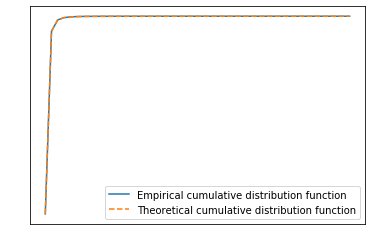

In [8]:
zipfECDFs = []
xrange = 50
for samples in zipfSamples:
    for sample in samples:
        x = range(xrange)
        ecdf = ECDF(sample)
        zipfECDFs.append(ecdf(x))
        plt.plot(x, ecdf(x), label='Empirical cumulative distribution function')
        plt.plot(x, zipf.cdf(x, s), label='Theoretical cumulative distribution function', ls='--')
        plt.legend(loc='lower right')
        plt.show()

#### 2.2.1.2. Верхние границы разностей каждой пары эмпирических функций распределения

In [9]:
zipfECDFs = np.array(zipfECDFs).reshape(5, 5, xrange)

for n in zipfECDFs:
    for i in range(len(n)-1):
        for j in range(i+1, len(n)):
            print('%.2f'%max(abs(n[i] - n[j])), end=' ')
    print()

0.00 0.40 0.20 0.00 0.40 0.20 0.00 0.20 0.40 0.20 
0.00 0.20 0.10 0.10 0.20 0.10 0.10 0.10 0.10 0.10 
0.02 0.03 0.07 0.04 0.02 0.05 0.02 0.04 0.03 0.03 
0.03 0.02 0.02 0.03 0.01 0.00 0.01 0.01 0.01 0.01 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 


С увеличением объёма выборки верхняя граница разности каждой пары эмпирических функций распределения стремится к нулю, а каждая ЭФР стремится к теоретической функции распределения. Это подтверждается теоремой Гливенко — Кантелли.

### 2.2.2. Распределение Парето

#### 2.2.2.1. Эмпирические функции распределения

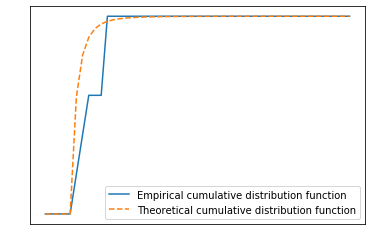

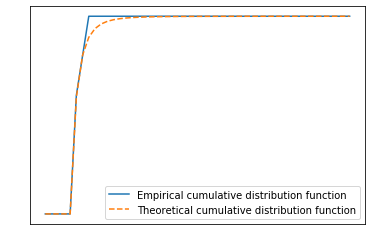

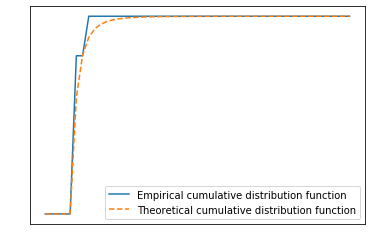

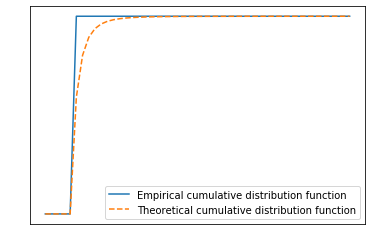

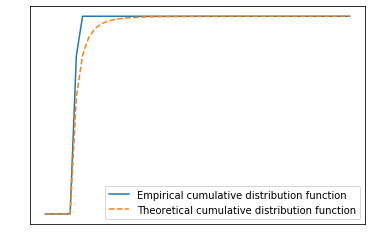

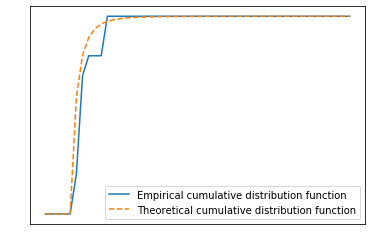

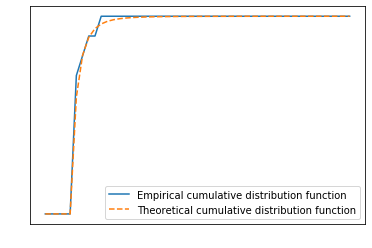

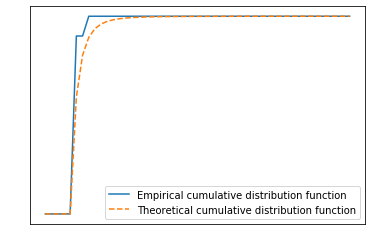

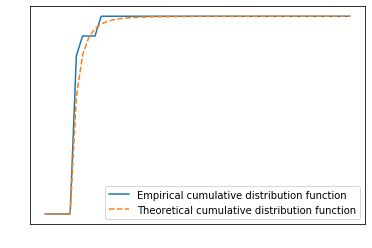

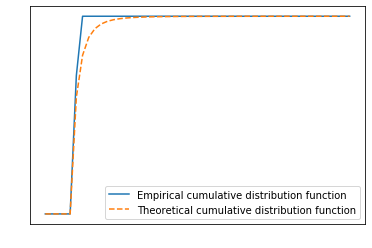

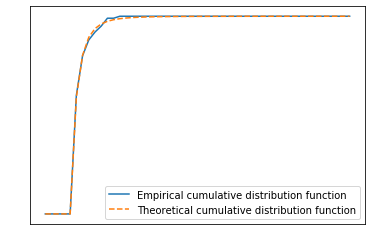

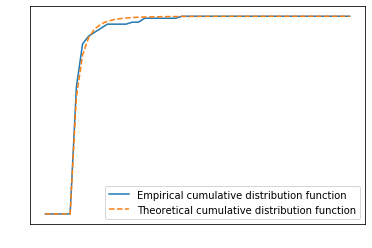

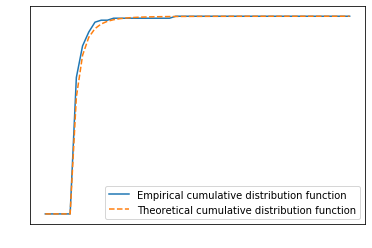

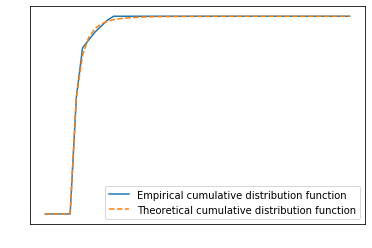

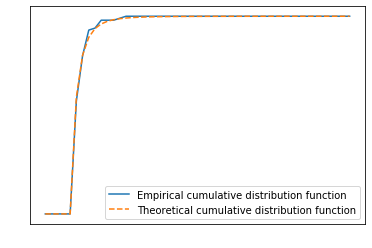

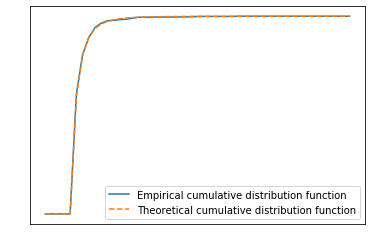

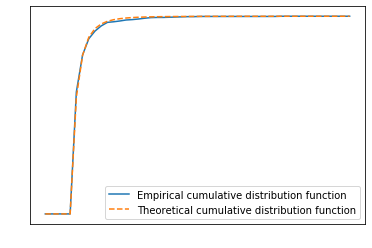

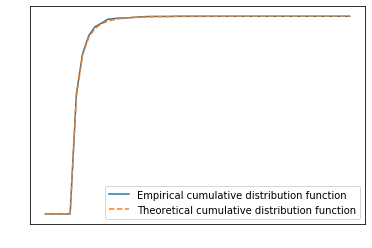

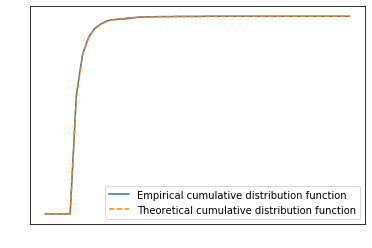

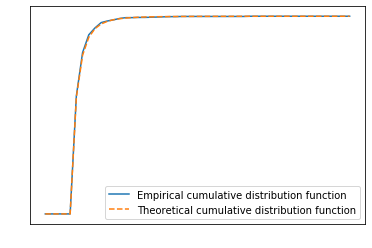

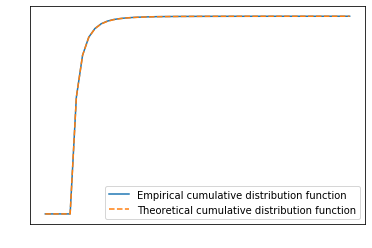

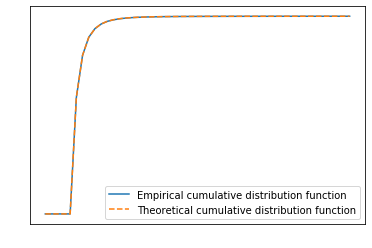

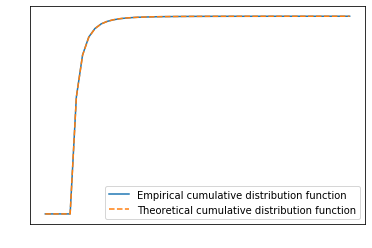

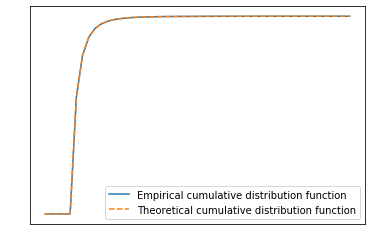

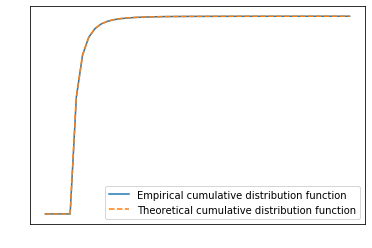

In [10]:
paretoECDFs = []
# xrange = 50
for samples in paretoSamples:
    for sample in samples:
        x = range(xrange)
        ecdf = ECDF(sample)
        paretoECDFs.append(ecdf(x))
        plt.plot(x, ecdf(x), label='Empirical cumulative distribution function')
        plt.plot(x, pareto.cdf(x, a, scale=xm), label='Theoretical cumulative distribution function', ls='--')
        plt.legend(loc='lower right')
        plt.show()

#### 2.2.2.2. Верхние границы разностей каждой пары эмпирических функций распределения

In [11]:
paretoECDFs = np.array(paretoECDFs).reshape(5, 5, xrange)

for n in paretoECDFs:
    for i in range(len(n)-1):
        for j in range(i+1, len(n)):
            print('%.2f'%max(abs(n[i] - n[j])), end=' ')
    print()

0.40 0.60 0.80 0.60 0.20 0.40 0.20 0.20 0.20 0.20 
0.50 0.70 0.60 0.50 0.20 0.10 0.20 0.10 0.20 0.10 
0.06 0.09 0.04 0.05 0.05 0.05 0.07 0.10 0.12 0.05 
0.02 0.01 0.00 0.01 0.02 0.02 0.02 0.01 0.01 0.01 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 


С увеличением объёма выборки верхняя граница разности каждой пары эмпирических функций распределения стремится к нулю, а каждая ЭФР стремится к теоретической функции распределения. Это подтверждается теоремой Гливенко — Кантелли.

## 2.3. Построение вариационного ряда выборки

### 2.3.1. Распределение Ципфа

#### 2.3.1.1. Дискретный вариационный ряд

In [12]:
zipfOrdered = []
for samples in zipfSamples:
    for sample in samples:
        zipfOrdered.append(np.unique(sample, return_counts=True))
zipfOrdered = np.array(zipfOrdered).reshape(5, 5, 2)

<i>Представление данных: [варианты частоты].</i>

In [13]:
print(*zipfOrdered[0], sep='\n')   # n = 5

[array([1]) array([5], dtype=int64)]
[array([1]) array([5], dtype=int64)]
[array([1, 2]) array([3, 2], dtype=int64)]
[array([1, 3]) array([4, 1], dtype=int64)]
[array([1]) array([5], dtype=int64)]


In [14]:
print(*zipfOrdered[1], sep='\n')   # n = 10

[array([1]) array([10], dtype=int64)]
[array([1]) array([10], dtype=int64)]
[array([1, 2]) array([8, 2], dtype=int64)]
[array([1, 3]) array([9, 1], dtype=int64)]
[array([1, 2]) array([9, 1], dtype=int64)]


#### 2.3.1.2. Квантили

In [15]:
quantileLevels = [0.1, 0.5, 0.7]

##### 2.3.2.2.1. Эмпирические квантили

In [16]:
for samples in zipfSamples:
    print(*np.quantile(samples, quantileLevels, axis=1).T)

[1. 1. 1.] [1. 1. 1.] [1.  1.  1.8] [1. 1. 1.] [1. 1. 1.]
[1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.]
[1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.]
[1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.]
[1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.]


##### 2.3.2.2.2. Теоретические квантили

In [17]:
print(zipf.ppf(quantileLevels, s))

[1. 1. 1.]


С увеличением объёма выборки эмпирические квантили стремятся к теоретическим.

### 2.3.2. Распределение Парето

#### 2.3.2.1. Интервальный вариационный ряд

Для расчёта количества интервалов используется формула Стёрджеса: $k = \left\lfloor{1+3,322\lg n}\right\rfloor$, где $k$ – количество интервалов, $n$ – объём выборки.

In [18]:
paretoSamples[0][0]

array([5.83, 4.28, 6.18, 9.3 , 9.83])

In [19]:
paretoOrdered = []
for samples in paretoSamples:
    for sample in samples:
        ptemp = np.linspace(np.min(sample)-.01, 
                            np.max(sample), 
                            int(1 + 3.322*np.log10(len(sample)) + 1))
        intervals = np.empty((len(ptemp)-1, 2))
        for k in range(len(intervals)):
            intervals[k][0] = ptemp[k]
            intervals[k][1] = ptemp[k+1]
        frequencies = np.zeros(len(intervals), dtype=int)
        for x in sample:
            for k in range(len(intervals)):
                if x > intervals[k][0] and x <= intervals[k][1]:
                    frequencies[k] += 1
                    break
        paretoOrdered.append((intervals, frequencies))
paretoOrdered = np.array(paretoOrdered).reshape(5, 5, 2)

<i>Представление данных: [интервалы частоты].</i>

In [20]:
print(*paretoOrdered[0], sep='\n\n')   # n = 5

[array([[4.27, 6.12],
       [6.12, 7.98],
       [7.98, 9.83]])
 array([2, 1, 2])]

[array([[4.  , 4.89],
       [4.89, 5.78],
       [5.78, 6.67]])
 array([3, 0, 2])]

[array([[4.05, 4.84],
       [4.84, 5.63],
       [5.63, 6.41]])
 array([4, 0, 1])]

[array([[4.04, 4.32],
       [4.32, 4.6 ],
       [4.6 , 4.89]])
 array([2, 1, 2])]

[array([[4.06, 4.67],
       [4.67, 5.28],
       [5.28, 5.89]])
 array([3, 1, 1])]


In [21]:
print(*paretoOrdered[1], sep='\n\n')   # n = 10

[array([[4.27, 5.66],
       [5.66, 7.05],
       [7.05, 8.44],
       [8.44, 9.83]])
 array([5, 3, 0, 2])]

[array([[4.  , 5.2 ],
       [5.2 , 6.41],
       [6.41, 7.61],
       [7.61, 8.82]])
 array([7, 1, 1, 1])]

[array([[4.05, 4.64],
       [4.64, 5.23],
       [5.23, 5.82],
       [5.82, 6.41]])
 array([8, 1, 0, 1])]

[array([[4.04, 5.06],
       [5.06, 6.08],
       [6.08, 7.1 ],
       [7.1 , 8.12]])
 array([8, 1, 0, 1])]

[array([[4.03, 4.49],
       [4.49, 4.96],
       [4.96, 5.42],
       [5.42, 5.89]])
 array([5, 2, 2, 1])]


#### 2.3.2.2. Квантили

In [22]:
# quantileLevels = [0.1, 0.5, 0.7]

##### 2.3.2.2.1. Эмпирические квантили

In [23]:
for samples in paretoSamples:
    print(*np.quantile(samples, quantileLevels, axis=1).T)

[4.9  6.18 8.67] [4.16 4.79 5.59] [4.11 4.34 4.45] [4.13 4.47 4.75] [4.13 4.36 4.74]
[4.61 5.66 5.93] [4.23 4.79 5.14] [4.11 4.36 4.41] [4.07 4.37 4.84] [4.07 4.65 5.02]
[4.09 4.66 5.33] [4.1  4.68 5.23] [4.08 4.59 5.04] [4.1  4.82 5.37] [4.08 4.9  5.51]
[4.11 4.72 5.35] [4.12 4.7  5.3 ] [4.09 4.68 5.34] [4.1  4.75 5.37] [4.11 4.78 5.38]
[4.11 4.76 5.4 ] [4.11 4.76 5.41] [4.11 4.75 5.4 ] [4.11 4.76 5.41] [4.11 4.75 5.4 ]


##### 2.3.2.2.2. Теоретические квантили

In [24]:
print(pareto.ppf(quantileLevels, a, scale=xm))

[4.11 4.76 5.4 ]


С увеличением объёма выборки эмпирические квантили стремятся к теоретическим.

## 2.4. Построение гистограмм и полигонов относительных частот

### 2.4.1. Распределение Ципфа

<i>В целях читаемости графики отображены только в диапазоне $[1, 10)$.</i>

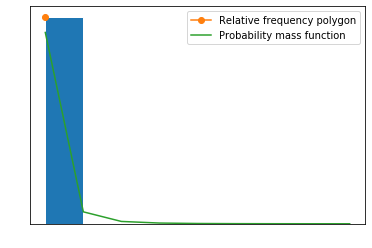

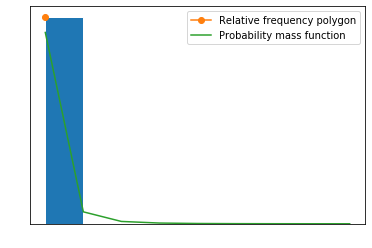

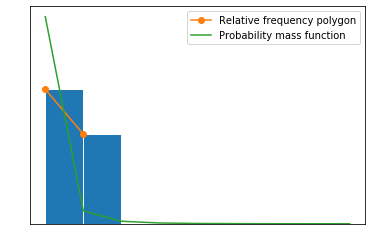

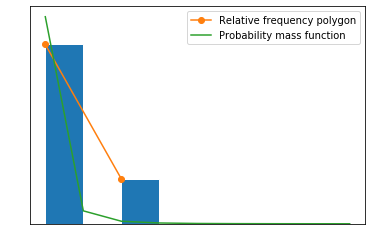

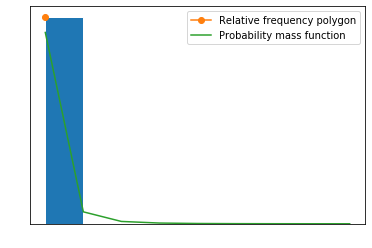

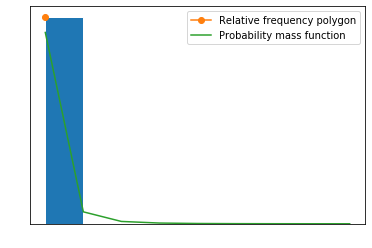

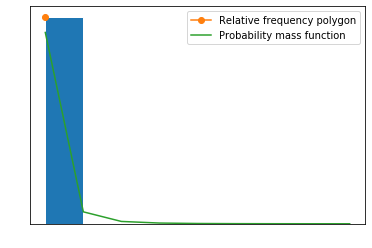

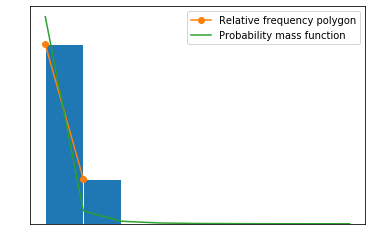

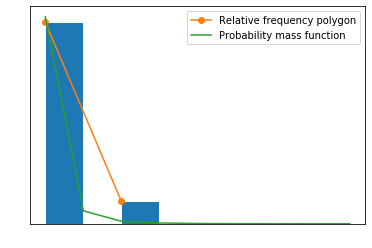

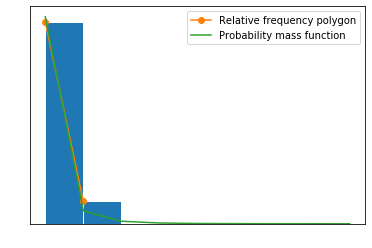

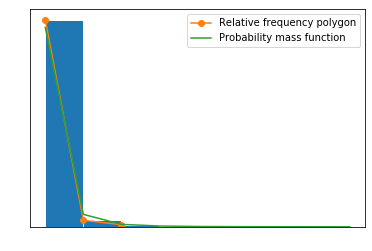

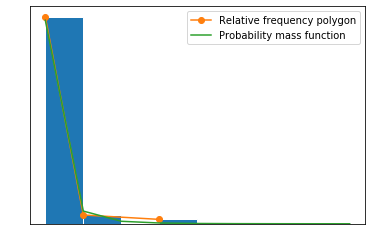

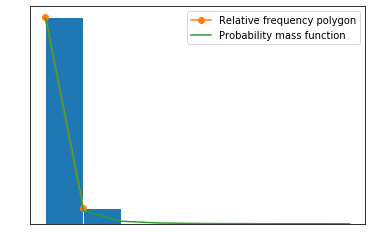

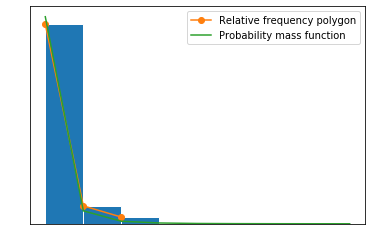

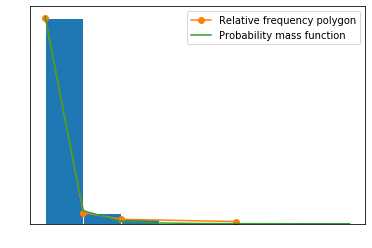

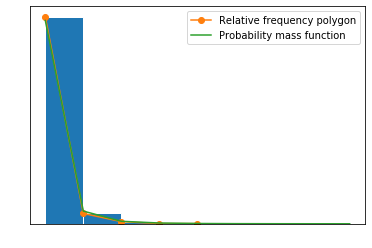

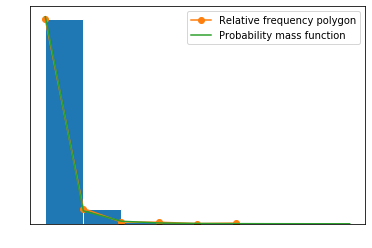

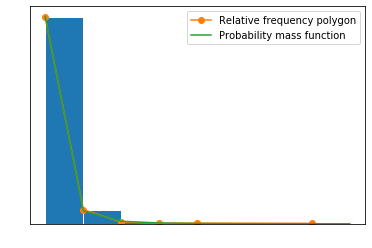

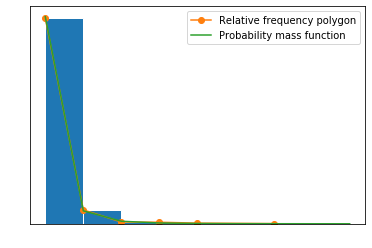

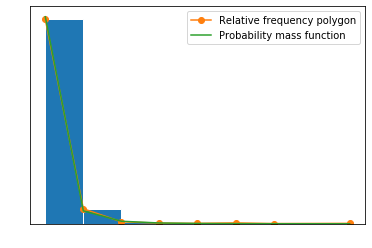

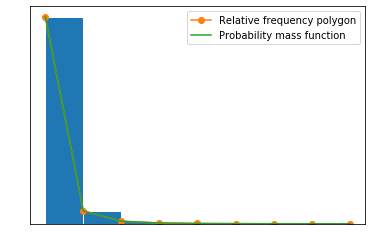

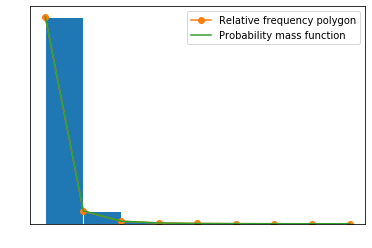

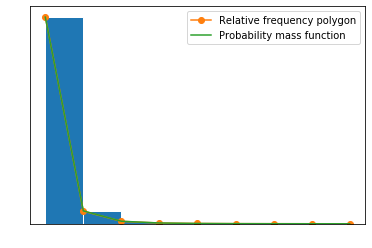

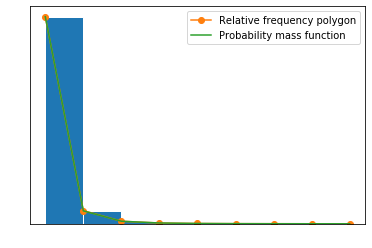

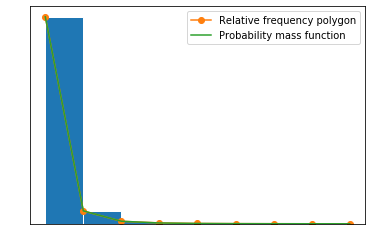

In [25]:
for i in range(len(zipfSamples)):
    for j in range(len(zipfSamples[i])):
        plt.hist(zipfSamples[i][j], bins=range(1, 10), edgecolor='white', density=True)
        plt.plot(zipfOrdered[i][j][0][zipfOrdered[i][j][0]<10], 
                 zipfOrdered[i][j][1][zipfOrdered[i][j][0]<10] / len(zipfSamples[i][j]), 
                 '-o',
                label='Relative frequency polygon')
        plt.plot(range(1, 10), zipf.pmf(range(1, 10), s), label='Probability mass function')
        plt.legend(loc='upper right')
        plt.show()

### 2.4.2. Распределение Парето

<i>В целях читаемости графики отображены только в диапазоне $[x_m, x_m+10)$.</i>

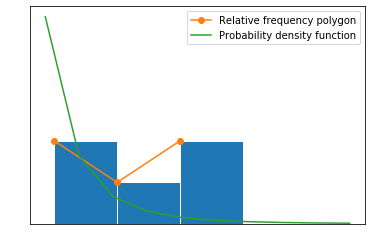

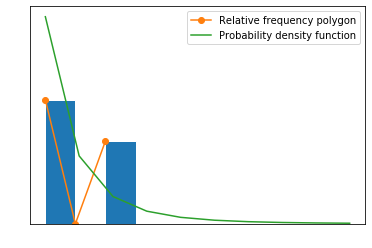

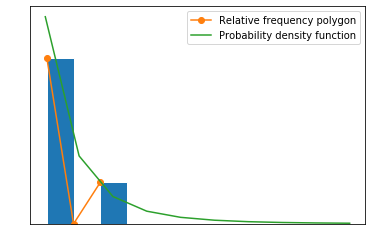

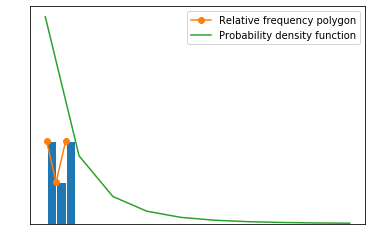

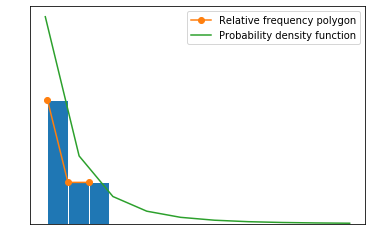

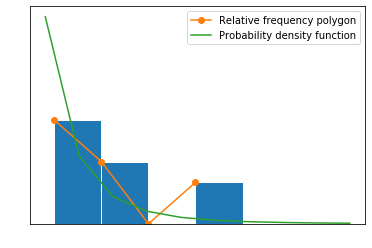

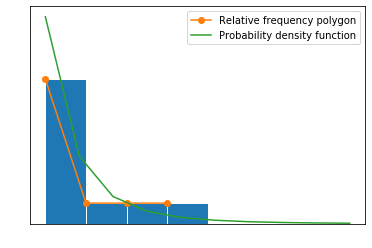

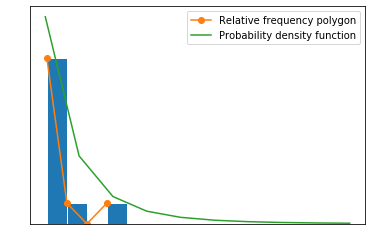

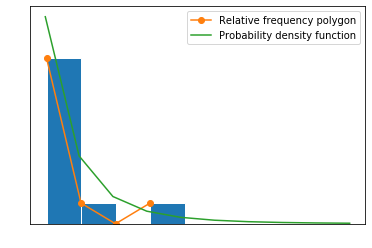

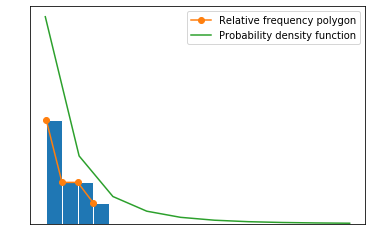

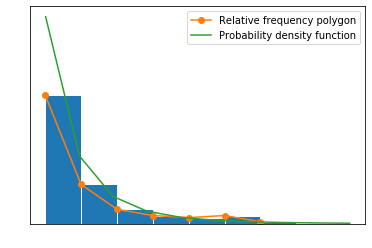

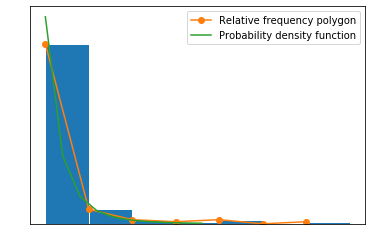

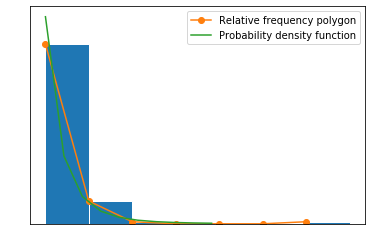

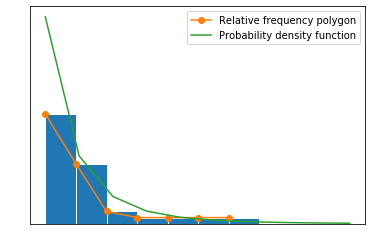

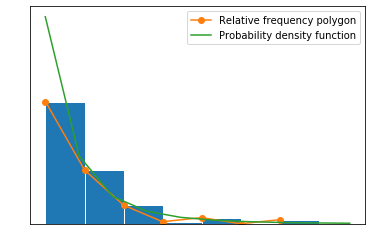

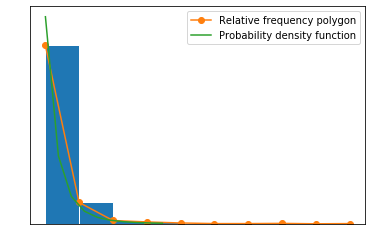

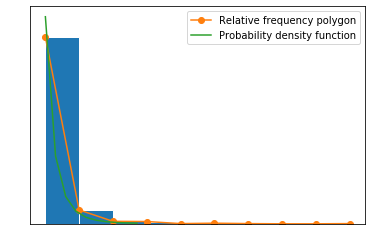

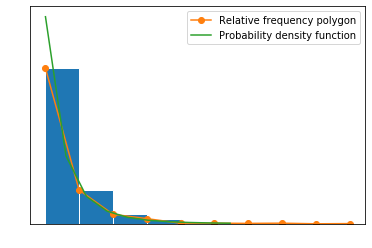

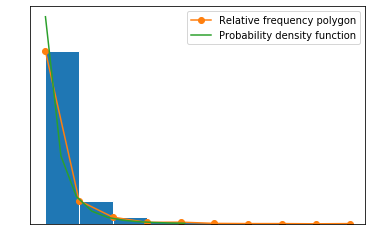

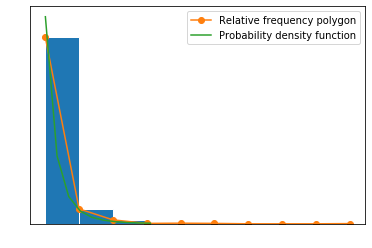

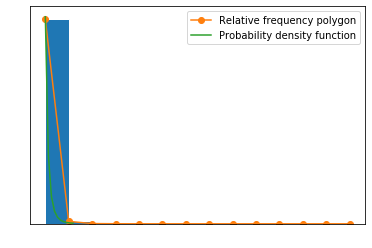

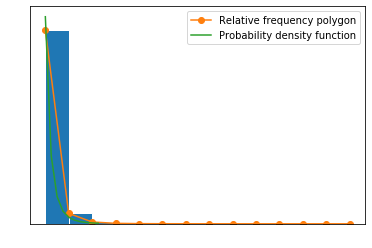

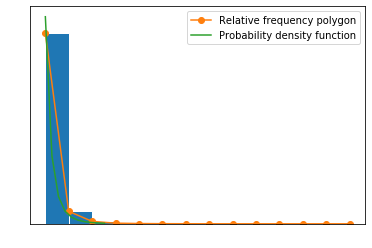

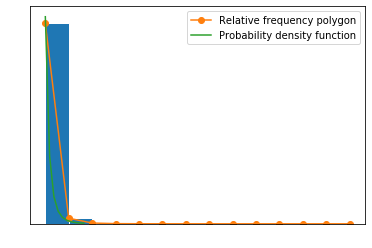

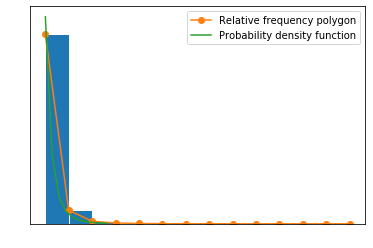

In [26]:
for i in range(len(paretoSamples)):
    for j in range(len(paretoSamples[i])):
        binN = np.linspace(min(paretoSamples[i][j])-.01, 
                           max(paretoSamples[i][j]), 
                           num=int(1 + 3.322*np.log10(len(paretoSamples[i][j])) + 1))[:10]
        plt.hist(paretoSamples[i][j], 
                 bins=binN, 
                 weights=[1/len(paretoSamples[i][j])]*len(paretoSamples[i][j]),
                 edgecolor='white')
        plt.plot(np.min(paretoOrdered[i][j][0], axis=1)[:xm+10], 
                 paretoOrdered[i][j][1][:xm+10] / len(paretoSamples[i][j]), 
                 '-o', 
                 label='Relative frequency polygon')
        plt.plot(range(xm, xm+10), 
                 pareto.pdf(range(xm, xm+10), a, scale=xm), 
                 label='Probability density function')
        plt.legend(loc='upper right')
        plt.show()

---

# ДЗ3. Оценки

## 3.1. Нахождение выборочного среднего и выборочной дисперсии 

### 3.1.1. Распределение Ципфа

#### 3.1.1.1. Выборочное среднее и математическое ожидание

In [27]:
for i in zipfSamples:
    print(np.mean(i, axis=1))

[1.  1.  1.4 1.4 1. ]
[1.  1.  1.2 1.2 1.1]
[1.05 1.1  1.07 1.14 1.14]
[1.07 1.12 1.11 1.14 1.14]
[1.11 1.11 1.11 1.11 1.11]


In [28]:
zipf.mean(s)

1.110626535326148

Чем больше объём выборки, тем ближе выборочное среднее к математическому ожиданию.<br>
Выборочное среднее – несмещённая, состоятельная и асимптотически нормальная оценка математического ожидания.

#### 3.1.1.2. Выборочная дисперсия и теоретическая дисперсия

In [29]:
for i in zipfSamples:
    print(np.var(i, axis=1))

[0.   0.   0.24 0.64 0.  ]
[0.   0.   0.16 0.36 0.09]
[0.07 0.21 0.07 0.18 0.36]
[0.11 0.24 0.26 0.59 0.41]
[0.3  0.27 0.26 0.26 0.26]


In [30]:
zipf.var(s)

0.2863264536645034

Чем больше объём выборки, тем ближе выборочная дисперсия к теоретической дисперсии.<br>
Выборочная дисперсия – смещённая и состоятельная оценка теоретической дисперсии.

### 3.1.2. Распределение Парето

#### 3.1.2.1. Выборочное среднее и математическое ожидание

In [31]:
for i in paretoSamples:
    print(np.mean(i, axis=1))

[7.08 5.13 4.7  4.5  4.67]
[6.16 5.28 4.55 4.85 4.72]
[5.26 5.45 5.12 5.26 5.29]
[5.33 5.43 5.24 5.3  5.32]
[5.33 5.34 5.33 5.33 5.33]


In [32]:
pareto.mean(a, scale=xm)

5.333333333333333

Чем больше объём выборки, тем ближе выборочное среднее к математическому ожиданию.<br>
Выборочное среднее – несмещённая, состоятельная и асимптотически нормальная оценка математического ожидания.

#### 3.1.2.2. Выборочная дисперсия и дисперсия

In [33]:
for i in paretoSamples:
    print(np.var(i, axis=1))

[4.54 0.95 0.76 0.1  0.43]
[3.2  1.96 0.43 1.35 0.32]
[2.32 6.55 3.57 2.06 2.08]
[4.11 5.52 2.57 3.32 3.61]
[3.57 3.69 3.46 3.44 3.55]


In [34]:
pareto.var(a, scale=xm)

3.5555555555555554

Чем больше объём выборки, тем ближе выборочная дисперсия к теоретической дисперсии.<br>
Выборочная дисперсия – смещённая и состоятельная оценка теоретической дисперсии.

## 3.2. Нахождение параметров распределений событий 

### 3.2.1. Распределение Ципфа. Оценка параметра $s$ (экспоненты)

In [1]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wlexpr
session = WolframLanguageSession()

$$f_\theta(x) = \frac1{x^\theta\zeta(\theta)}$$

Находим максимум логарифма функции правдоподобия:

$$L_\theta(X) = \prod_{i=1}^n f_\theta(X_i)$$

$$\ln L_\theta(X) = \sum_{i=1}^n \ln f_\theta(X_i)$$

$$\frac{\partial\ln L_\theta(X)}{\partial\theta} 
= \sum_{i=1}^n \frac{\frac{\partial}{\partial\theta}f_\theta(X_i)}{f_\theta(X_i)}
= \sum_{i=1}^n \frac{-\frac{\ln X_i}{X_i^\theta\zeta(\theta)}-\frac{-\sum_{j=2}^\infty\frac{\ln j}{j^\theta}}{X_i^\theta\zeta^2(\theta)}}{\frac1{X_i^\theta\zeta(\theta)}} = $$

$$ = \sum_{i=1}^n\left(\frac{\sum_{j=2}^\infty\frac{\ln j}{j^\theta}}{\zeta(\theta)}-\ln X_i\right)
= \frac{n}{\zeta(\theta)} \sum_{j=2}^\infty \frac{\ln j}{j^\theta} - \sum_{i=1}^n \ln X_i$$

Приравниваем полученный вклад выборки к нулю и получаем оценку параметра численно:

$$\frac{n}{\zeta(\theta)} \sum_{j=2}^\infty \frac{\ln j}{j^\theta} - \sum_{i=1}^n \ln X_i = 0$$

In [5]:
war = [24677, 18226, 14293, 9611, 9177, 8648, 7558, 6883, 5678, 5557, 5037, 4577, 4111, 3939, 3843, 3732]
t = session.evaluate(wlexpr(
    'FindRoot[%d/Zeta[t] Sum[Log[j]/j^t, {j, 2, Infinity}] - %f, {t, 1.0001}][[1, 2]]'
    %(len(war), np.sum(np.log(war)))))
t

1.1060693746068675

In [36]:
zipfEstimator = session.evaluate(wlexpr(
    'FindRoot[%d/Zeta[t] Sum[Log[j]/j^t, {j, 2, Infinity}] - %f, {t, 1.0001}][[1, 2]]'
    %(1e5, np.sum(np.log(zipfSamples[4][0])))))
print('Estimated value:', zipfEstimator)
print('Real value:', s)

Estimated value: 3.9891512009688572
Real value: 4


Эта оценка (по свойствам ОМП) состоятельна, асимптотически эффективна и асимптотически нормальна.<br>
Её смещение:

In [37]:
zipfEstimator-s

-0.010848799031142775

In [38]:
# оценка методом моментов (оставлю для истории)
session.evaluate(wlexpr('FindRoot[Zeta[t - 1]/Zeta[t] == %f, {t, 1}][[1, 2]]'%np.mean(zipfSamples[4][0])))

3.9782812372857466

In [39]:
session.terminate()

### 3.2.2. Распределение Парето. Оценка параметра $a$ (формы)

$$f_\theta(x) = \frac{\theta x_m^\theta}{x^{\theta-1}}$$

Находим максимум логарифма функции правдоподобия:

$$L_\theta(X) = \prod_{i=1}^n f_\theta(X_i)$$

$$\ln L_\theta(X) = \sum_{i=1}^n \ln f_\theta(X_i)$$

$$\frac{\partial\ln L_\theta(X)}{\partial\theta} 
= \sum_{i=1}^n\frac{\frac{\partial}{\partial\theta}f_\theta(X_i)}{f_\theta(X_i)}
= \sum_{i=1}^n \frac{X_i^{\theta-1}}{\theta x_m^\theta}\left(X_i^{1-\theta}x_m^\theta-X_i^{1-\theta}x_m^\theta\theta\ln X_i+X_i^{1-\theta}x_m^\theta\theta\ln x_m\right) = $$

$$ = \sum_{i=1}^n \left(\frac1\theta-\ln X_i+\ln x_m\right) 
= \frac{n}\theta-\sum_{i=1}^n\ln\frac{X_i}{x_m}$$

Приравниваем полученный вклад выборки к нулю и выражаем параметр $\theta$:

$$\frac{n}\theta-\sum_{i=1}^n\ln\frac{X_i}{x_m} = 0$$

$$\theta = \frac{n}{\sum_{i=1}^n\ln\frac{X_i}{x_m}}$$

Эта оценка (по свойствам ОМП) состоятельна, асимптотически эффективна и асимптотически нормальна.

Если существует такая функция $a_n$, что выполняется критерий эффективности Рао-Крамера-Фреше

$$T(X)-\tau(\theta) = a_n(\theta)\frac{\partial\ln L_\theta(X)}{\partial\theta},$$

то оценка $T(X)$ является эффективной. Для уравнения

$$\frac{n}{\sum_{i=1}^n\ln\frac{X_i}{x_m}}-\theta = a_n(\theta)\left(\frac{n}\theta-\sum_{i=1}^n\ln\frac{X_i}{x_m}\right)$$

такая функция существует:

$$a_n(\theta) = \frac\theta{\sum_{i=1}^n\ln\frac{X_i}{x_m}}.$$

Следовательно, найденная оценка является эффективной, а значит, оптимальной и несмещённой оценкой и достаточной статистикой.

In [40]:
paretoEstimator = 1e5 / np.sum(np.log(paretoSamples[4][0])-np.log(xm))
print('Estimated value:', paretoEstimator)
print('Real value:', a)

Estimated value: 4.008488197613626
Real value: 4


___

# ДЗ4. Проверка статистических гипотез

## 4.1. Проверка гипотез о виде распределения

Пусть $X = (X_1, \dots, X_n)$ – выборка из распределения $\mathscr L(\xi)$ с неизвестной функцией распределения $F_\xi(x)$. Тогда простая гипотеза о виде распределения выглядит следующим образом:

$$H_0: F_\xi(x) = F(x),$$

где $F(x)$ – теоретическая функция распределения Ципфа или Парето.

Сложная гипотеза о виде распределения:

$$H_0: F_\xi(x) = \mathscr F(x), \quad \theta \in \Theta,$$

где $\mathscr F(x) = \{F(x;\theta), \, \theta \in \Theta\}$ – параметрическое семейство функций распределения Ципфа или Парето.

### 4.1.1. Критерий согласия Колмогорова для простой гипотезы

Критерий Комогорова применяется в тех случаях, когда $F(x)$ непрерывна. Его статистика

$$\mathscr D_n = \mathscr D_n(X) = \sup_{|x|<\infty}|F_n(x)-F(x)|,$$

имеет распределение Колмогорова и представляет собой максимальное отклонение эмпирической функции распределения $F_n(x)$ от теоретической функции распределения $F(x)$. При каждом $x$ величина $F_n(x)$ является оптимальной оценкой для $F(x)$, и с увеличением объёма выборки $n$ происходит сближение $F_n(x)$ с $F(x)$, поэтому, по крайней мере при больших $n$, в тех случаях, когда гипотеза $H_0$ истинна, значение $\mathscr D_n$ не должно существенно отклоняться от нуля. Отсюда следует, что критическую область критерия, основанного на статистике $\mathscr D_n$, следует задавать в виде $\mathscr T_{1\alpha}: \mathscr D_n \geqslant t_\alpha$.

Особенностями статистики $\mathscr D_n$ является то, что её распределение при гипотезе $H_0$ не зависит от вида функции $F(x)$, а при больших $n$ (уже при $n\geqslant20$) не зависит ещё и от $n$.

Следовательно, критическую границу $t_\alpha$ можно полагать равной $\frac{\lambda_\alpha}{\sqrt n}$, где $K(\lambda_\alpha) = 1-\alpha$ ($K$ – функция распределения Колмогорова, $\alpha$ – уровень значимости).

Для $\alpha=0.1$: $\lambda_\alpha=1.22$; для $\alpha=0.05$: $\lambda_\alpha=1.36$.

___
Соответственно, критерий согласия Колмогорова для простой гипотезы имеет следующий вид:

$$\sqrt n \mathscr D_n \geqslant \lambda_\alpha \Leftrightarrow H_0 \, отвергается.$$

___

Недостатком критерия является вероятность ошибочно отклонить гипотезу $H_0$, когда она верна.

In [41]:
lambdas, n = {.1: 1.22, .05: 1.36}, {3: 1000, 4: 100000}
def checkKolmogorov(h0type):
    param = a if h0type == 'Простая' else paretoEstimator
    for alpha in lambdas:
        for i in (3, 4):
            print(f'\nalpha = {alpha:.2}, n = {n[i]}:')
            for num, ecdf in enumerate(paretoECDFs[i]):
                print(f' Выборка №{num}:', end=' ')
                print('Гипотеза отвергается, выборка не соответствует распределению Парето' if
                    np.sqrt(n[i]) * max(abs((ecdf+xm)-(pareto.cdf(range(xrange), a, scale=xm)+xm))) 
                    >= lambdas[alpha]
                     else 'Данные не противоречат гипотезе')

In [42]:
checkKolmogorov('Простая')


alpha = 0.1, n = 1000:
 Выборка №0: Данные не противоречат гипотезе
 Выборка №1: Данные не противоречат гипотезе
 Выборка №2: Данные не противоречат гипотезе
 Выборка №3: Данные не противоречат гипотезе
 Выборка №4: Данные не противоречат гипотезе

alpha = 0.1, n = 100000:
 Выборка №0: Данные не противоречат гипотезе
 Выборка №1: Данные не противоречат гипотезе
 Выборка №2: Данные не противоречат гипотезе
 Выборка №3: Данные не противоречат гипотезе
 Выборка №4: Данные не противоречат гипотезе

alpha = 0.05, n = 1000:
 Выборка №0: Данные не противоречат гипотезе
 Выборка №1: Данные не противоречат гипотезе
 Выборка №2: Данные не противоречат гипотезе
 Выборка №3: Данные не противоречат гипотезе
 Выборка №4: Данные не противоречат гипотезе

alpha = 0.05, n = 100000:
 Выборка №0: Данные не противоречат гипотезе
 Выборка №1: Данные не противоречат гипотезе
 Выборка №2: Данные не противоречат гипотезе
 Выборка №3: Данные не противоречат гипотезе
 Выборка №4: Данные не противоречат гипотез

Как видно, верная гипотеза принимается для всех выборок, что и ожидалось.

### 4.1.2. Критерий согласия Колмогорова для сложной гипотезы

Статистика критерия для сложной гипотезы аналогична случаю с простой гипотезой:

$$\mathscr D_n = \mathscr D_n(X,\theta) = \sup_{|x|<\infty}|F_n(x)-F(x,\theta)|.$$

Здесь $\hat\theta$ – оценка максимального правдоподобия неизвестного параметра распределения Парето. Эта статистика, однако, распределена не по закону Колмогорова и зависит как от вида наблюдаемого закона, так и от типа оцениваемого параметра и числа оцениваемых параметров.

Для проверки критерия возьмём оценку параметра из первой выборки для $n=100000$ и проверим гипотезу о виде распределения по всем выборкам (для $n=1000$, $n=100 000$).

In [43]:
paretoEstimator

4.008488197613626

In [44]:
checkKolmogorov('Сложная')


alpha = 0.1, n = 1000:
 Выборка №0: Данные не противоречат гипотезе
 Выборка №1: Данные не противоречат гипотезе
 Выборка №2: Данные не противоречат гипотезе
 Выборка №3: Данные не противоречат гипотезе
 Выборка №4: Данные не противоречат гипотезе

alpha = 0.1, n = 100000:
 Выборка №0: Данные не противоречат гипотезе
 Выборка №1: Данные не противоречат гипотезе
 Выборка №2: Данные не противоречат гипотезе
 Выборка №3: Данные не противоречат гипотезе
 Выборка №4: Данные не противоречат гипотезе

alpha = 0.05, n = 1000:
 Выборка №0: Данные не противоречат гипотезе
 Выборка №1: Данные не противоречат гипотезе
 Выборка №2: Данные не противоречат гипотезе
 Выборка №3: Данные не противоречат гипотезе
 Выборка №4: Данные не противоречат гипотезе

alpha = 0.05, n = 100000:
 Выборка №0: Данные не противоречат гипотезе
 Выборка №1: Данные не противоречат гипотезе
 Выборка №2: Данные не противоречат гипотезе
 Выборка №3: Данные не противоречат гипотезе
 Выборка №4: Данные не противоречат гипотез

Как видно, верная гипотеза принимается для всех выборок, что и ожидалось.

### 4.1.3. Критерий согласия хи-квадрат для простой гипотезы

Пусть  $X = (X_1, X_2, \dots, X_n)$ – выборка независимых одинаково распределённых случайных величин, 
$\nu = (\nu_1, \nu_2, \dots, \nu_N)$ – частоты попадания выборочных данных в соответствующие подмножества группировки $\varepsilon_1, \varepsilon_2, \dots, \varepsilon_N$ ($\sum_{i=1}^N\nu_i=n$) и $p^0 = (p^0_1, p^0_2, \dots, p^0_N)$, где $p^0_i = \mathbf P(\xi \in \varepsilon_i | H_0), \, i = \overline{1,N}$.

Тогда $\mathscr L(\nu | H_0) = \mathbf M(n, p)$, т. е. $\nu$ имеет полиномиальное распределение, где $p = (p_1, p_2, \dots, p_n)$ – вероятности попадания исследуемой случайной величины в соответствующие подмножества группировки $\varepsilon_1, \varepsilon_2, \dots, \varepsilon_N$.

Простая гипотеза $H_0$ сводится к тому, что $p=p^0$ – заданный вероятностный вектор, $0 < p^0_i < 1, \, i = \overline{1,N}; \; \sum_{i=1}^N p^0_i = 1$.

Статистика, характеризующая отклонение выборочных данных от соответствующих гипотетических значений: 

$$\chi_n^2 = \chi_n^2(\nu) = \sum_{i=1}^N\frac{(\nu_i-np^0_i)^2}{np^0_i} = \sum_{i=1}^N\frac{\nu_i^2}{n p^0_i}-n.$$

В пределе: $\mathscr L(\chi_n^2|H_0) \to \chi^2(N-1)$ при $n \to \infty$.

Критическая граница: $t_\alpha = \chi^2_{1-\alpha,N-1}$, что является квантилем распределения $\chi^2(N-1)$ уровня $1-\alpha$, где $\alpha$ – уровень значимости.

Действительно:

$$\mathbf P(\chi_n^2 \in \mathscr T_{1x} | H_0) = \mathbf P(\chi_n^2 \geqslant \chi^2_{1-\alpha,N-1} | H_0) \approx \int\limits_{\chi^2_{1-\alpha,N-1}}^\infty f_{N-1}(x)\,dx = \alpha,$$

где $\mathscr T_{1x}$ – критическая область, $f_{N-1}(x)$ – плотность распределения $\chi^2(N-1)$.
___
Таким образом, критерий согласия хи-квадрат для простой гипотезы имеет следующий вид:

$$\chi_n^2 \geqslant \chi^2_{1-\alpha,N-1} \Leftrightarrow H_0 \, отвергается.$$

___

Критерий хи-квадрат можно применять даже в том случае, когда данные имеют нечисловой характер. Тем не менее, некоторая информация о выборке теряется при группировке. 

Критерий применяется при $n\geqslant50,\;\nu_i\geqslant5,\,i=\overline{1,N}$.

Для расчёта оптимального количества интервалов используется, если необходимо, правило Стёрджеса: $N = 1 + \lfloor\log_2n\rfloor$, где n – объём выборки.

In [45]:
def checkChi2(samples, distribution, h0type):
    n = len(samples[0])
    print(f'\nn = {n}:')
    for sampleNum, sample in enumerate(samples):
        if distribution == 'Ципфа':
            borders = np.unique(sample)
        if distribution == 'Парето':
            borders = np.quantile(sample, np.linspace(0, 1, 1 + int(np.log2(n))))
#         borders = np.linspace(min(sample)-.01, max(sample), min(1 + int(np.log2(n)), max(sample)))
        N = len(borders) - 1
        nu = np.zeros(N, dtype=int)
        for x in sample:
            for i in range(N):
                if x > borders[i] and x <= borders[i+1]:
                    nu[i] += 1
                    break
        p = np.empty(N)
        for i in range(N):
            if distribution == 'Ципфа':
                param = s if h0type == 'Простая' else zipfEstimator
                p[i] = zipf.cdf(borders[i+1], param) - zipf.cdf(borders[i], param)
            if distribution == 'Парето':
                param = a if h0type == 'Простая' else paretoEstimator
                p[i] = pareto.cdf(borders[i+1], param, scale=xm)-pareto.cdf(borders[i], param, scale=xm)
        print(f' Выборка №{sampleNum}:')
        for alpha in (.1, .05):
            print(f'  alpha = {alpha}:', end=' ')
            stat = np.sum([(nu[i]-n*p[i])**2 / (n*p[i]) for i in range(N)])
            crit = chi2.ppf(alpha, N-1)
            if stat >= crit:
                print('Данные не противоречат гипотезе')
            else:
                print('Гипотеза отвергается, выборка не соответствует распределению', distribution)

In [46]:
for samples in zipfSamples[3:]:
    checkChi2(samples, 'Ципфа', 'Простая')


n = 1000:
 Выборка №0:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №1:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №2:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №3:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №4:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе

n = 100000:
 Выборка №0:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №1:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №2:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №3:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выб

In [47]:
for samples in paretoSamples[3:]:
    checkChi2(samples, 'Парето', 'Простая')


n = 1000:
 Выборка №0:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №1:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №2:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №3:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №4:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе

n = 100000:
 Выборка №0:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №1:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №2:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №3:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выб

Как видно, верная гипотеза принимается для всех выборок, что и ожидалось.

### 4.1.4. Критерий согласия хи-квадрат для сложной гипотезы

Сложная гипотеза для распределений Ципфа и Парето сводится к следующему виду:

$$H_0: p = p(\theta), \, \theta \in \mathbb R,$$

где $p$ – заданный вероятностный вектор; $\theta$ – неизвестный параметр распределения.

Статистика аналогична случаю с простой гипотезой: 

$$\chi_n^2 = \chi_n^2(\hat\theta)=\sum_{j=1}^N\frac{(\nu_j-n p_j(\hat\theta))^2}{n p_j(\hat\theta)}.$$

Здесь $\hat\theta$ – оценка максимального правдоподобия неизвестного параметра.

В пределе: $\mathscr L(\chi_n^2|H_0) \to \chi^2(N-2)$ при $n \to \infty$.

Критическая граница: $t_\alpha = \chi^2_{1-\alpha,N-2}$, что является квантилем распределения $\chi^2(N-2)$ уровня $1-\alpha$, где $\alpha$ – уровень значимости.
___
Соответственно, критерий согласия хи-квадрат для сложной гипотезы имеет следующий вид:

$$\chi_n^2 \geqslant \chi^2_{1-\alpha,N-2} \Leftrightarrow H_0 \, отвергается.$$

___

In [48]:
zipfEstimator

3.9891512009688572

In [49]:
for samples in zipfSamples[3:]:
    checkChi2(samples, 'Ципфа', 'Сложная')


n = 1000:
 Выборка №0:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №1:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №2:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №3:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №4:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе

n = 100000:
 Выборка №0:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №1:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №2:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №3:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выб

In [50]:
paretoEstimator

4.008488197613626

In [51]:
for samples in paretoSamples[3:]:
    checkChi2(samples, 'Парето', 'Сложная')


n = 1000:
 Выборка №0:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №1:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №2:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №3:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №4:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе

n = 100000:
 Выборка №0:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №1:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №2:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выборка №3:
  alpha = 0.1: Данные не противоречат гипотезе
  alpha = 0.05: Данные не противоречат гипотезе
 Выб

Как видно, верная гипотеза принимается для всех выборок, что и ожидалось.

## 4.2. Проверка параметрических гипотез

Простые гипотезы для распределений Ципфа и Парето:

$$H_0: \theta = \theta_0 = 4,$$
$$H_1: \theta = \theta_1 = 8.$$

Требуется выяснить, верна или не верна гипотеза $H_0$, т. е. надо построить такое правило (критерий), которое позволяло бы для каждой реализации $x$ выборки $X$ принять одно из двух решений: принять гипотезу $H_0$ или отклонить её (принять $H_1$). Тем самым каждому критерию соответствует разбиение выборочного пространства $\mathscr X$ на два взаимно дополнительных множества $\mathscr X_0$ и $\mathscr X_1$, где $\mathscr X_0$ состоит из точек $x$, для которых гипотеза $H_0$ принимается (область принятия), а $\mathscr X_1$ – из точек, для которых $H_0$ отвергается (критическая область).

В процессе проверки гипотезы $H_0$ можно прийти к правильному решению или совершить ошибку первого рода – отклонить $H_0$, когда она верна, или ошибку второго рода – принять $H_0$, когда она ложна.

Вероятности этих ошибок можно выразить через функцию мощности $W(\theta)$ критерия $\mathscr X_1$:

$$W(\theta) = W(\mathscr X_1; \theta) = \mathbf P(X \in \mathscr X_1), \quad \theta \in \Theta.$$

Для проверки параметрических гипотез будет использован критерий Неймана – Пирсона, который основывается на вычислении статистики отношения правдоподобия:

$$l(X) = \frac{L(X;\theta_1)}{L(X;\theta_0)} 
= \frac{\prod_{i=1}^n f_{\theta_1}(X_i)}{\prod_{i=1}^n f_{\theta_0}(X_i)}.$$

Критической границей критерия является такое число $c_\alpha$, что $\mathbf P(l(X) \geqslant c_\alpha)$, где $c_\alpha$ рассчитывается из уравнения $\mathbf P(l(X) \geqslant c_\alpha) = \alpha$ при заданном уровне значимости $\alpha$. Это эквивалентно $F_{l(X)}(c_\alpha) = 1-\alpha$, то есть $c_\alpha$ – квантиль распределения $l(X)$ уровня $1-\alpha$. Для распределений Ципфа и Парето удобнее находить критическую границу, используя логарифм статистики отношения правдоподобия: $\ln l(X) \geqslant \ln c_\alpha$. 

___

Таким образом, критерий Неймана – Пирсона для распределения Парето выглядит следующим образом:

$$\exp[\ln l(X)] \geqslant \exp[\ln c_\alpha] \Leftrightarrow H_0 \, отвергается.$$

___

В случае с распределением Ципфа придётся воспользоваться ещё и приёмом рандомизации, так как в силу дискретности распределения выборки невозможно получить точное значение $\alpha$ за счёт выбора границы $c_\alpha$. Для этого определим такое $k=k(\alpha)$, что

$$\sum_{x: l(x) \geqslant l_{k+1}} L(x;\theta_0) < \alpha \leqslant \sum_{x: l(x) \geqslant l_k} L(x;\theta_0).$$

Если в правой части имеет место равенство, то 

$$\mathscr X_{1\alpha} = \{x: l(x) \geqslant l_k\}.$$

Теперь рассмотрим случай, когда в соотношении равенства строгие. Пусть

$$\alpha_i = \sum_{x: l(x) \geqslant l_{k+1}} L(x;\theta_i),$$

$$p_i = \mathbf P_{\theta_i}(l(X)=l_k) = \sum_{x: l(x)=l_k} L(x; \theta_i), \quad i=0,1.$$

Тогда неравенство запишется в данном случае в виде $0 < \alpha-\alpha_0 < p_0$. Построим рандомизированный критерий с уровнем значимости $\alpha$:

$$\varphi^*(x) = \begin{cases}
    1, & l(x)>l_k,\\
    \frac{\alpha-\alpha_0}{p_0}, & l(x)=l_k,\\
    0, & l(x)<l_k.
\end{cases}$$

Вероятность ошибки первого рода такого критерия:

$$\mathbf P(H_1 | H_0) = \mathbf E_{\theta_0} \varphi^*(X)
= \mathbf P_{\theta_0}(l(X)>l_k) + \frac{\alpha-\alpha_0}{p_0} \mathbf P_{\theta_0}(l(X)=l_k) = \alpha_0 + \frac{\alpha-\alpha_0}{p_0} p_0 = \alpha,$$

что и требовалось показать.

### 4.2.1. Распределение Ципфа

$$f_\theta(k) = \frac1{k^\theta\zeta(\theta)}.$$

$$L(X;\theta) = \prod_{i=1}^n f_\theta(X_i) = \frac1{\prod_{i=1}^n X_i^\theta\zeta(\theta)}
= \frac1{\zeta^n(\theta)\prod_{i=1}^n X_i^\theta},$$

$$l(X) 
= \frac{\zeta^n(\theta_0)\prod_{i=1}^n X_i^{\theta_0}}{\zeta^n(\theta_1)\prod_{i=1}^n X_i^{\theta_1}}
= \frac{\zeta^n(\theta_0)}{\zeta^n(\theta_1)}\prod_{i=1}^n X_i^{\theta_0-\theta_1},$$

$$\ln l(X) 
= \ln\frac{\zeta^n(\theta_0)}{\zeta^n(\theta_1)} + \sum_{i=1}^n \ln X_i^{\theta_0-\theta_1}
= n\ln\frac{\zeta(\theta_0)}{\zeta(\theta_1)} + (\theta_0-\theta_1)\sum_{i=1}^n\ln X_i.$$

Для нахождения критической границы необходимо узнать распределение случайной величины $\sum_{i=1}^n\ln X_i$. 

(✖╭╮✖)

In [52]:
# from scipy.special import zeta
# t0, t1 = 4, 8
# for i in n:
#     print(f'\nn = {n[i]}:')
#     for num, sample in enumerate(zipfSamples[i]):
#         print(f' Выборка №{num}:')
#         for alpha in (.1, .05):
#             ln_l_X = len(sample)*np.log(zeta(t0)/zeta(t1)) + (t0-t1)*sum(np.log(sample))
            
#             print(f'  alpha = {alpha}:', end=' ')

### 4.2.2. Распределение Парето

$$f_\theta(x) = \frac{\theta x_m^\theta}{x^{\theta-1}} 
= x\theta\left(\frac{x_m}{x}\right)^\theta
= \exp\left[ \ln x + \ln\theta - \theta\ln\frac{x}{x_m} \right].$$

$$L(X;\theta) = \prod_{i=1}^n f_\theta(X_i) 
= \prod_{i=1}^n \exp\left[ \ln X_i + \ln\theta - \theta\ln\frac{X_i}{x_m} \right] = $$
$$ = \exp\left[ \sum_{i=1}^n \left( \ln X_i + \ln\theta - \theta\ln\frac{X_i}{x_m} \right) \right]
= \exp\left[ \sum_{i=1}^n\ln X_i + n\ln\theta - \theta\sum_{i=1}^n\ln\frac{X_i}{x_m} \right],$$

$$l(X) = \frac{
    \exp\left[
        \sum_{i=1}^n\ln X_i + n\ln\theta_1 - \theta_1\sum_{i=1}^n\ln\frac{X_i}{x_m}
    \right]
}{
    \exp\left[
        \sum_{i=1}^n\ln X_i + n\ln\theta_0 - \theta_0\sum_{i=1}^n\ln\frac{X_i}{x_m}
    \right]
} = \exp\left[ 
    n\ln\frac{\theta_1}{\theta_0} - (\theta_1-\theta_0)\sum_{i=1}^n\ln\frac{X_i}{x_m}
\right],$$ 

$$\ln l(X) 
= n\ln\frac{\theta_1}{\theta_0} + (\theta_0-\theta_1)\sum_{i=1}^n\ln\frac{X_i}{x_m}.$$

Заметим, что случайная величина $\ln\frac{X_i}{x_m}$ имеет экспоненциальное распределение с параметром $\theta$, а сумма таких случайных величин имеет гамма-распределение:

$$\sum_{i=1}^n\ln\frac{X_i}{x_m} \sim \Gamma(n,1/\theta).$$

Найдём критическую границу:

$$n\ln\frac{\theta_1}{\theta_0}+(\theta_0-\theta_1)\sum_{i=1}^n\ln\frac{X_i}{x_m} 
\geqslant \ln c_\alpha,$$

$$\sum_{i=1}^n\ln\frac{X_i}{x_m} 
\geqslant \frac{\ln c_\alpha-n\ln\frac{\theta_1}{\theta_0}}{\theta_0-\theta_1} = c_\alpha',$$

$$\ln c_\alpha = c_\alpha'(\theta_0-\theta_1) + n\ln\frac{\theta_1}{\theta_0}.$$

Число $c_\alpha'$ – квантиль распределения $\Gamma(n,1/\theta)$ уровня $1-\alpha$. Посчитаем для $\theta_0=4$ и $\theta_1=8$, найдём собственно критическую краницу $c_\alpha$ и проверим правильность гипотез.

In [53]:
t0, t1 = 4, 8
for h, t in enumerate((t0, t1)):
    print(f'\n\nГИПОТЕЗА H{h}, theta = {t}:')
    for i in n:
        print(f'\n n = {n[i]}:')
        for num, sample in enumerate(paretoSamples[i]):
            print(f'  Выборка №{num}:')
            for alpha in (.1, .05):
                ln_l_X = len(sample)*np.log(t1/t0*xm**(t1-t0)) - (t1-t0)*sum(np.log(sample))
                ln_c_alpha = gamma.ppf(1-alpha, len(sample), scale=1/t)*(t0-t1) + len(sample)*np.log(t1/t0)
                print(f'   alpha = {alpha}:', end=' ')
                if np.exp(ln_l_X) >= np.exp(ln_c_alpha):
                    print('Данные не противоречат гипотезе')
                else:
                    print('Гипотеза отвергается')



ГИПОТЕЗА H0, theta = 4:

 n = 1000:
  Выборка №0:
   alpha = 0.1: Данные не противоречат гипотезе
   alpha = 0.05: Данные не противоречат гипотезе
  Выборка №1:
   alpha = 0.1: Данные не противоречат гипотезе
   alpha = 0.05: Данные не противоречат гипотезе
  Выборка №2:
   alpha = 0.1: Данные не противоречат гипотезе
   alpha = 0.05: Данные не противоречат гипотезе
  Выборка №3:
   alpha = 0.1: Данные не противоречат гипотезе
   alpha = 0.05: Данные не противоречат гипотезе
  Выборка №4:
   alpha = 0.1: Данные не противоречат гипотезе
   alpha = 0.05: Данные не противоречат гипотезе

 n = 100000:
  Выборка №0:
   alpha = 0.1: Данные не противоречат гипотезе
   alpha = 0.05: Данные не противоречат гипотезе
  Выборка №1:
   alpha = 0.1: Данные не противоречат гипотезе
   alpha = 0.05: Данные не противоречат гипотезе
  Выборка №2:
   alpha = 0.1: Данные не противоречат гипотезе
   alpha = 0.05: Данные не противоречат гипотезе
  Выборка №3:
   alpha = 0.1: Данные не противоречат гипотез

Как видно, верная гипотеза принимается, а неверная – отвергается для всех выборок, что и ожидалось.